### Sample program for Neural Network  

#### Import libraries  

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense

import  os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' 

#### Set data    

In [9]:
dat = np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]])
data_train = dat[:, :-1]
class_train = dat[:, -1]
print('data:', data_train.shape)
print('class:', class_train.shape)

data: (4, 2)
class: (4,)


#### Making model and exec training  

In [10]:
%%time

model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, class_train,
          epochs=1000, batch_size=1)

Epoch 1/1000
4/4 [==============================] - 0s 961us/step - loss: 0.6888 - accuracy: 0.7500
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.7500
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.7500
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.7500
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.7500
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.7500
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.7500
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.7500
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.7500
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.7500
Epoch 11/1000
4/4

#### Prediction for training data  

In [11]:
pred = model.predict(data_train)
print(pred)

[[0.01887009]
 [0.00697148]
 [0.4592206 ]
 [0.4592206 ]]


#### Teacher signal for separating hyperplane  

In [12]:
t1 = data_train[ class_train==1 ]
t0 = data_train[ class_train==0 ]
t1_x = t1[:, 0]
t1_y = t1[:, 1]
t0_x = t0[:, 0]
t0_y = t0[:, 1]

#### Grid points for separating hyperplane  

In [13]:
g = np.loadtxt('grid01_21x21.csv', delimiter=',')
print(g.shape)
print(model.predict(g).shape)
pred_g = model.predict(g)[:, 0]
g1 = g[ pred_g >= 0.5 ]
g0 = g[ pred_g < 0.5 ]
g1_x = g1[:, 0]
g1_y = g1[:, 1]
g0_x = g0[:, 0]
g0_y = g0[:, 1]

(441, 2)
(441, 1)


#### Plot of separating hyperplane  

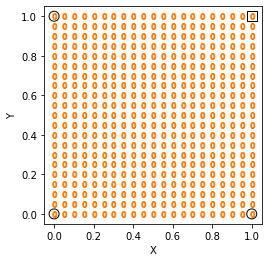

In [14]:
plt.scatter(t1_x, t1_y, marker='s', facecolor='none', edgecolor='black', s=100)
plt.scatter(t0_x, t0_y, marker='o', facecolor='none', edgecolor='black', s=100)
plt.scatter(g1_x, g1_y, marker='$1$')
plt.scatter(g0_x, g0_y, marker='$0$')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()